## 作業目標
* 畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？
* 確保同學知道如何改變參數以及理解 cv2.calcHist 這個函數輸出的資料含義

In [1]:
import os
from tensorflow import keras
os.environ["CUDA_VISIBLE_DEVICES"] = "" # 使用 CPU

import cv2 # 載入 cv2 套件
import matplotlib.pyplot as plt

train, test = keras.datasets.cifar10.load_data()

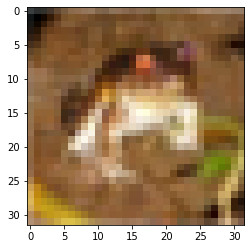

In [2]:
image = train[0][0] # 讀取圖片

plt.imshow(image)
plt.show()

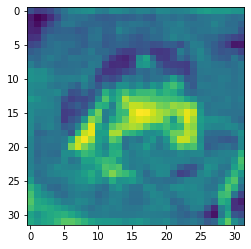

In [3]:
# 把彩色的圖片轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* images (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

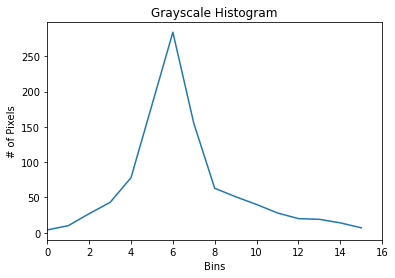

In [4]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
hist = cv2.calcHist([gray], [0], None, [16], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 16])
plt.show()

In [5]:
print('pixels:')
hist

pixels:


array([[  4.],
       [ 10.],
       [ 27.],
       [ 43.],
       [ 78.],
       [181.],
       [284.],
       [155.],
       [ 63.],
       [ 51.],
       [ 40.],
       [ 28.],
       [ 20.],
       [ 19.],
       [ 14.],
       [  7.]], dtype=float32)

In [6]:
print("hist shape:", hist.shape, "\n直方圖中前兩個值:", hist[:2]) # 1 表示該灰度圖中，只有 1 個 pixel 的值是 0，0 個 pixel 的值是 1

hist shape: (16, 1) 
直方圖中前兩個值: [[ 4.]
 [10.]]


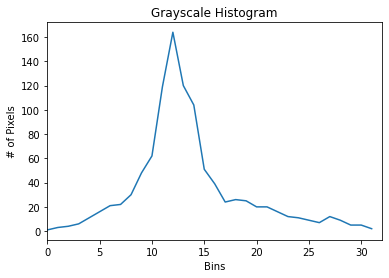

In [7]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
hist = cv2.calcHist([gray], [0], None, [32], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 32])
plt.show()

In [8]:
print('pixels:')
hist

pixels:


array([[  1.],
       [  3.],
       [  4.],
       [  6.],
       [ 11.],
       [ 16.],
       [ 21.],
       [ 22.],
       [ 30.],
       [ 48.],
       [ 62.],
       [119.],
       [164.],
       [120.],
       [104.],
       [ 51.],
       [ 39.],
       [ 24.],
       [ 26.],
       [ 25.],
       [ 20.],
       [ 20.],
       [ 16.],
       [ 12.],
       [ 11.],
       [  9.],
       [  7.],
       [ 12.],
       [  9.],
       [  5.],
       [  5.],
       [  2.]], dtype=float32)

In [9]:
print("hist shape:", hist.shape, "\n直方圖中前兩個值:", hist[:2]) # 1 表示該灰度圖中，只有 1 個 pixel 的值是 0，0 個 pixel 的值是 1

hist shape: (32, 1) 
直方圖中前兩個值: [[1.]
 [3.]]



pixels:r
[[  1.]
 [  4.]
 [  9.]
 [ 19.]
 [ 28.]
 [ 36.]
 [ 80.]
 [162.]
 [286.]
 [158.]
 [ 65.]
 [ 52.]
 [ 41.]
 [ 36.]
 [ 28.]
 [ 19.]]

pixels:g
[[  6.]
 [ 17.]
 [ 35.]
 [ 57.]
 [111.]
 [277.]
 [204.]
 [ 97.]
 [ 53.]
 [ 49.]
 [ 38.]
 [ 24.]
 [ 17.]
 [ 18.]
 [ 14.]
 [  7.]]

pixels:b
[[ 34.]
 [108.]
 [238.]
 [296.]
 [127.]
 [ 63.]
 [ 49.]
 [ 21.]
 [ 22.]
 [ 14.]
 [ 16.]
 [  9.]
 [ 13.]
 [  9.]
 [  5.]
 [  0.]]


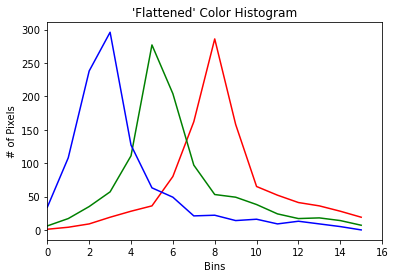

In [10]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [16], [0, 256])
    
    print()
    print('pixels:'+str(color))
    print(hist)
    
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 16])
plt.show()


pixels:r
[[  1.]
 [  0.]
 [  3.]
 [  1.]
 [  6.]
 [  3.]
 [  9.]
 [ 10.]
 [ 13.]
 [ 15.]
 [ 17.]
 [ 19.]
 [ 33.]
 [ 47.]
 [ 49.]
 [113.]
 [146.]
 [140.]
 [104.]
 [ 54.]
 [ 34.]
 [ 31.]
 [ 18.]
 [ 34.]
 [ 17.]
 [ 24.]
 [ 17.]
 [ 19.]
 [ 17.]
 [ 11.]
 [ 12.]
 [  7.]]

pixels:g
[[  3.]
 [  3.]
 [  4.]
 [ 13.]
 [ 16.]
 [ 19.]
 [ 25.]
 [ 32.]
 [ 40.]
 [ 71.]
 [113.]
 [164.]
 [107.]
 [ 97.]
 [ 57.]
 [ 40.]
 [ 31.]
 [ 22.]
 [ 28.]
 [ 21.]
 [ 19.]
 [ 19.]
 [ 14.]
 [ 10.]
 [ 12.]
 [  5.]
 [  7.]
 [ 11.]
 [  9.]
 [  5.]
 [  5.]
 [  2.]]

pixels:b
[[  9.]
 [ 25.]
 [ 50.]
 [ 58.]
 [116.]
 [122.]
 [163.]
 [133.]
 [ 72.]
 [ 55.]
 [ 36.]
 [ 27.]
 [ 23.]
 [ 26.]
 [ 16.]
 [  5.]
 [ 10.]
 [ 12.]
 [  7.]
 [  7.]
 [ 10.]
 [  6.]
 [  7.]
 [  2.]
 [ 10.]
 [  3.]
 [  7.]
 [  2.]
 [  3.]
 [  2.]
 [  0.]
 [  0.]]


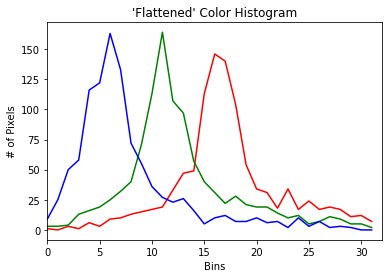

In [11]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [32], [0, 256])
    
    print()
    print('pixels:'+str(color))
    print(hist)
    
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 32])
plt.show()